# _Stjórn_ Segmentation

| Work         | Date             | Material      | Incipit                                                                         |
| ------------ | ---------------- | ------------- | ------------------------------------------------------------------------------- |
| _Stjórn I_   | s. xiv in.       | Gn--Ex 18.27  | i upphafi skapadi gud himin þat er sealft himinriki                             |
| _Stjórn II_  | s. xiii in.      | Ex 19--Dt     | a þridia manadi eptir brottfaur gydinga af egiptalandi komu þeir i audn synay   |
| _Stjórn III_ | s. xiii med.     | Ios           | moyses agietr guds uin aðr hann andadizt hafðe at guds raaðe                    |
| _Stjórn IV_  | ?                | Ios           | eptir andlat moyses ok harmsong þann er gydingar sungu eptir hann               |
| _Stjórn III_ | as above         | Idc--Rg       | efter andlat iosue læitaði israels lyðr raðs uið guð sua segiandi               |

Unger's edition follows AM 226 (written 1360x1370); Astås primarily follows AM 227 (written ca. 1350). _Stjórn IV_ refers to a shorter redaction of the material from the Book of Joshua, drawn from Peter Comestor's _Historica Scholastica_ and contained in AM 226 (and copied thence into AM 225). Unger prints both III and IV.

In [1]:
import glob,json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
titles = ['prologue', 'introduction', 'gn', 'ex', 'lv', 'nm', 'dt', 'ios', 'idc', 'rt', '1sm', '2sm', '3rg', '4rg']
works = ['stjorn1', 'stjorn2', 'stjorn4', 'stjorn3']



In [3]:
tokens = []
for title in titles:
    with open(f"nlp/{title}.txt") as raw:
        document = raw.read().replace('\n', ' ')
        tokens.extend(document.split())


In [4]:
incipits = {
    'prologue': 'her hefr upp prologum',
    'introduction': 'almattigr gud uerandi satt lios',
    'gn1': 'i upphafi skapadi gud himin þat er sealft himinriki',
    'gn2': 'himinn ok iǫrd uaru nu algǫr',
    'gn3': 'hǫggormrinn uar klokaztr ok slægaztr',
    'gn4': 'adam ok eua sua sem truat er gengu af guðs bodordum',
    # (Gn 5 not really represented)
    #'gn5': 'noe gat sém chám ok iapheth', 
    'gn6': 'sua sem moyses byreaði sina frasǫgn af flodinu',
    'gn7': 'eptir þat er orkin uar algǫr taladi gud sua til noe',
    'gn8': 'eptir þat mintiz guð noa medr sinni miskunnsemd',
    'gn9': 'blezadi gud þa noa ok sonum hans',
    # Gn 10 not represented
    'gn11a': 'fyrr nefndr son sém arphaxath gat sér son er hét sale',
    # These sections represent SH and IE:
    'af skipan heimsins': 'asia er kallat af nafni nockurrar konu',
    'af egipta landi': 'samaria annarr partr palestine tok nafn af þorpi nǫckuru edr borg',
    'af orranum': 'orrinn er um rid uar nefndr er einn full ok prettafullr fugl',
    'af skyssiligum skrimslum': 'seres uar eitt frægt þorp edr borg',
    'af europa': 'eptir fyrr sagda luti af asia ero ok nǫckurir lutir skrifandi af europa',
    'flod': 'eyiarnar cretha ok ciclades eru hinn uii partr af grecia',
    'af affrica': 'affrica hinn þridi ueralldarinnar partr',
    'belo': 'þar er nu til at taka sem fyrri uar fra horfit at þann tima sem synir noa ok aðrir hans ættmenn',
    # Back to Genesis:
    'gn11b': 'thare gat iii syni abram nachor ok aram',
    'gn12': 'eptir þat sem thare uar andadr i aráán eðr charram sem fyrr uar fra sagt',
    'gn13': 'abram for nu i brott or egipto',
    'gn14': 'þat bar til aa nockurum tima nær þi sem nu uar fra sagt at amphael konungr af babilon',
    'gn15': 'þessum lutum sua lidnum sem nu uar fra sagt uitradiz gud abram',
    'gn16': 'þenna tima hafdi saray engi bǫrn gefit',
    'gn17': 'þann tima sem abram hafdi ix tigu aara ok ix áár',
    'gn18': 'drottinn uitradiz abrahe i dalinum mambre',
    'gn19': 'enn sua sem aa leid daginn ok miok sidla uar uordit',
    'gn20': 'abraham færdi sina bygd i brǫtt or dalnum mambre',
    'gn21': 'gud drottinn uitiadi til saram eptir þi sem hann hafdi heitit',
    'gn22': 'nockuru sidarr freistadi gud abrahams þann tima sem ysaach hafdi ii aar ok xx',
    'gn23': 'abraham fór sidan aptr til dalsins mambre',
    'gn24': 'abraham gordiz nu madr miok gamall',
    'gn25a': 'abraham geck at eiga þa konu eptir andlat sarre sem cethura het',
    'leoni sermones': 'alla tima er oss rett truadum monnum uel lifanda',
    'gn25b': 'nu er þar til maals at taka sem fyrr uar fra horfit at ysaach sun abrahams hafdi tekit rebeccam',
    'gn26': 'ðat bar til einn tima sua sem hin krankazta tid',
    'gn27': 'þar er nu til máls at taka at sua sem ysaach gerðiz madr miok gamalt',
    'gn28': 'esau hatadi iafnan sidan brødr sinn iacob',
    'gn29': 'þadan for iacob i mesopotamiam',
    'gn30': 'nu skal þar til taka sem fra uar horfit at sua sem ruben hinn ellzti son lye ok iacobs',
    'gn31': 'iacob gerðiz þa rikari madr',
    'gn32': 'ok sem iacob for þann sama ueg sem hann hafdi byreat',
    'gn33': 'ok sem iacobi uard litit framm aa ueginn fyrir sik saa hann ferd esau',
    'gn34': 'sua bar til einn tima at dyna dottir iacobs',
    'gn35': 'guð drottinn styrkti þa enn iacob',
    'gn36': 'eptir andlát ysaachs',
    'gn37': 'iacob staðfesti sina bygd aa þi sama landi chanáán',
    'gn38': 'nærri þersum tima ok helldr fyrri enn nu uar fra sagt skildiz iudas iacobs sun',
    'gn39': 'nu skal þar til taka sem fyrr uar fra horfit at fyrr nefndr putiphar hinn egiptzki',
    'gn40': 'eptir þersa luti umlidna sem nu uar fra sagt uard sa atburdr at ii gelldingar konungsins þionostumenn',
    'gn41a': 'eptir ii aar lidin upp fra þi sem nu uar sagt dreymdi konuniginn pharaonem draum',
    # From SH:
    'aseneth': 'a hinu fyrsta freoleiks aari af þeim uii sem ioseph sagdi fyrir at koma mundi',
    'gn41b': 'ioseph for um aull egiptalandz herud',
    'gn42': 'enn þa er iacob fretti at miol ok korn selldiz aa egiptalandi',
    'gn43': 'sulltr ok hallæri þrǫngdi þa af nyiu ollu þi landi',
    'gn44': 'eptir þat baud ioseph radsmanni sinum at hann skylldi fylla sekki þeirra allra',
    'gn45': 'eptir þersor hans ord fekk ioseph eigi lengr halldit sik',
    'gn46': 'israel bioz til brottferdar af chanaanslandi',
    'gn47a': 'eptir þat gekk ioseph fyrir konunginn ok sagdi honum at fadir hans',
    'af velraedum': 'þann tima sem iacob kom i fyrr nefnda egiptalandz haalfu gersen',
    'gn47b': 'israel bygdi aa fyrr sogdu landi gersen ok eignadiz þat',
    'gn48': 'nockuru sidarr uar ioseph sagt at fadir hans hafdi fengit mikinn siukdom',
    'gn49': 'eptir þat sem nu uar fra sagt kalladi iacob til sin alla sunu sina',
    'gn50': 'ok sem ioseph sa þat þa lagdiz hann nidr yfir hans likam',
    'af testamentis': 'af þi at xii synir israel huerir er iafnliga heita',
    'ex1': 'her hefr frasǫgn af annarri bok moysi',
    'ex2': 'eptir fyrr sagdan konungsins bodskap pharaonis byreaðan',
    'ex3': 'bar sua til at moyses geymdi sauda mágs sins raguels',
    'ex4': 'moyses suaradi ekki munu þeir trua mer',
    'ex5': 'eptir þat gengu þeir moyses ok aaron framm fyrir pharaonem',
    'ex6': 'gud taladi þa enn til moysen þu mant nu skiotligha siá',
    'ex7': 'gud taladi þa enn til moysen hird eigi þu at ottaz fyrir þann skylld',
    'ex8': 'gud taladi þa enn uid moysen ok sagdi sua gakk inn fyrir pharaonem',
    'ex9': 'gud taladi þa enn uid moysen gakk enn fyrir pharaonem ok ber honum minn bodskap sua segiandi',
    'ex10': 'eptir þat taladi gud uidr moysen gakk inn fyrir pharaonem',
    'ex11': 'gud taladi þa uid moysen eptir er enn eitt slagit',
    'ex12': 'gud drottinn taladi þa enn til moysen ok aaron sua sem þeir uaru aa egiptalandi þessi manadr skal ydr uera annarra manada upphaf',
    'ex13': 'enn fyrir þa grein at gud drottinn hafdi drepit alla egiptalandz frumburdi',
    'ex14': 'gud drottinn taladi þa enn til moysen ok bad hann gǫra rad',
    'ex15': 'eptir þersa hina haleitu iartegn ok frelsissigr er gud hafdi þeim gort',
    'ex16': 'þadan foru þeir aa hinum xu degi',
    'ex17': 'eptir þersar iartegnir foru allir israels synir i brott',
    'ex18': 'enn sua sem fyrr nefndr raguel kennimadr af madians landi',
    # Stjórn II starts here:
    'ex19': 'a þridia manadi eptir brottfaur gydinga af egiptalandi komu þeir i audn synay',
    'ex20': 'gud mællti uit allann gydinga lyd',
    'ex21': 'þesser ero domar þeir er þu skalt þeim firir setia',
    'ex22': 'ef nockur madr tekr naut eda saud ok haugr eda selr',
    'ex23': 'eigi skaltu liuga ne lygi trua eigi skaltu liuguitni bera med omilldum',
    'ex24': 'stig upp þu til drottins ok aaron',
    'ex25': 'gud mællti þa uit moysen biod þu sonum israel',
    'ex26': 'tialldbudina skaltu gera',
    'ex27': 'gera skaltu alltara af triam cethim',
    'ex28': 'aaron brodur þinn skaltu uigia',
    'ex29': 'þa er þu uigir aaron þa skaltu taka kalf',
    'ex30': 'gera skaltu alltara at færa reykelsi',
    'ex31': 'gud mællti enn uit moysen se herna',
    'ex32': 'gud gaf moysi tuær steintabulur',
    'ex33': 'moyses mællti uit drottinn þu bydr at ek leida lyd þenna',
    'ex34': 'giorr þu tuær tabulur af steine',
    'ex38-40': 'moyses liet gera tialldbudina eptir þui sem gud baud honum',
    'lv4-11': 'eptir þessa hluti gerdi gud langmal uit moysen',
    'lv12': 'gud mællti þa enn uit moysen mæl þu uit sonu israels ok seg þeim suo ef kona fædir sueinbarn',
    'lv13-16': 'gud setti langt laugmal',
    'lv18': 'gud mællti þa uit moysen mæl þu þessa hluti uit sonu israel ok seg þeim suo ek em drottinn gud yduar',
    'lv24': 'kona het salamid',
    'nm1': 'gud mællti þa uit moysen i eydimork synai i sattmalsbud',
    'nm2-10': 'gud mællti þa uit moysen lydrinn skal setia tialldbudir sinar',
    'nm11': 'i þui bili gerdizt gnadd',
    'nm12': 'ok er moyses uar þar kominn þa maugladi maria systir hans',
    'nm13': 'gydingar foru af meserad ok i eydimork',
    'nm14': 'enn er lydrinn heyrdi þessa frasaugn sendimanna moysi',
    'nm15': 'sa atburdr uard þa er gydingar uoru i eydimorkinne',
    'nm16': 'madr het chore',
    'nm17': 'gud mællti uit moysen tak þu af gydingum uondu tolf',
    'nm20': 'eptir þessa atburdi for moyses med ollum gydinga lyd i eydimork',
    'nm21': 'konungr het kananeus',
    'nm22': 'eptir þat foru gydingar aa uollu þa er uoru i riki moabs',
    'nm23': 'balaam mællti þa uit balac gior',
    'nm24': 'ok er balaam sa at gudi likadi at hann blezadi lydnum',
    'nm25': 'a þeirri tid uar gydinga lydr i þeim stad er sedi uar kalladr',
    'nm26': 'eptir þessa atburdi baud gud moysi at hann teldi alla kallmenn',
    'nm27-28': 'gud mællti uit moysen stig þu upp aa fiall eborim',
    'nm31': 'eptir þat mællti gud uit moysen hefn þu nu',
    # AM 226 lacks Nm 32--35 I guess
    'dt6': 'moyses ritadi nafn stada þeirra allra er þeir settu herbudir sinar i eydimarkinne',
    'dt27': 'moyses sette menn til at bleza þeim er guds laug helldu',
    'dt28': 'enn af þu heyrir ord drottins guds þins ok gerir',
    'dt29': 'þessi ero ord sattmals þess er drottinn baud moysi',
    'dt30': 'ok er moyses hafdi þessa hluti mællt uit lydinn þa mællti hann himin ok iord nefni ek i uætti',
    'dt31': 'ek hefi nu hundrat ara ok xx ar',
    'dt33': 'moyses blezadi sonum israel adr hann andadizt',
    'dt34': 'ok er moyses hafdi þetta mællt þa ste hann upp aa fiallit nebor',
    # Stjórn III starts here:
    'ios1(stj3)': 'moyses agietr guds uin aðr hann andadizt hafðe at guds raaðe ok fyrersǫgn sett',
    'ios2(stj3)': 'þa er iosue uar i þeim stad er sathim heiter',
    'ios3(stj3)': 'um morguninn eftir sem iosue oc allr herrinn uar klæddr',
    'ios4(stj3)': 'þa er allr israels lyðr uar yfir kominn farueg iordanar',
    'ios5(stj3)': 'allir konungar amorreorum þioða þeir er riktu fyrir uestan iordan',
    'ios6(stj3)': 'borgarmenn iericho byrgðu borgina oc biǫgguz fyrir til uarnar',
    'ios7(stj3)': 'sem iosue hafði brent borg iericho',
    'ios8(stj3)': 'eptir þat er achior uar dømðr oc drepinn',
    'ios9(stj3)': 'allir konungar þeir sem rikto austan fra fialli libano',
    'ios10(stj3)': 'adonisedech het konungr',
    'ios11(stj3)': 'sem iabin konungr af þi riki er heitir asor hæyrir gætit',
    'ios12(stj3)': 'oc gaf guð sinum lyð frið oc frelsi',
    'ios13-14(stj3)': 'þa er iosue uar staddr i galgala',
    'ios19-24(stj3)': 'eptir þat er hlutskipt uar allri iorð með israels folki',
    # Stjórn IV starts here:
    'ios1(stj4)': 'eptir andlat moyses ok harmsong þann er gydingar sungu eptir hann',
    'ios2(stj4)': 'sidan sendi iosue ii menn yfir iordan i iericho',
    'ios3(stj4)': 'eptir iii daga þadan fra mællti iosue uid lyðinn herklædiz þer i morgin',
    'ios4(stj4)': 'lydrinn for yfir iordan aa fyrsta manadi missera',
    'ios5(stj4)': 'a þeirri tid let iosue skira umskurdarskirn þa menn sem æigi uoru adr skirðir',
    'ios6(stj4)': 'ok um morgininn snimma uakti iosue upp uii kennimenn',
    'ios7(stj4)': 'achior het madr',
    'ios8(stj4)': 'eptir þenna atburd for iosue ok allr lydr uapnadr medr honum til ahilam borgar',
    'ios9(stj4)': 'gabaon het borg',
    'ios10(stj4)': 'a þeirri tid uar sa konungr yfir iorsalalandi er adenisedech het',
    'ios11(stj4)': 'konungr het iabin',
    'ios14-15(stj4)': 'iosue gaf kyni iuda fiallbygdir sudr aa landit',
    'ios15-18(stj4)': 'iosue kalladi þa saman allan lydinn i sylo',
    'ios22(stj4)': 'a xiiii aari bygdar gydinga lyds aa iorsalalandi mællti iosue uid kynsþatt rubens',
    'ios23-24(stj4)': 'þa er iosue tok af elldaz',
    # Stjórn III resumes here:
    'idc1': 'efter andlat iosue læitaði israels lyðr raðs uið guð sua segiandi',
    'idc2': 'nu fyrir þi at gyðingar hǫfðu gert sattmal uið hæiðingia i moti guðs boði',
    'idc3a': 'nu ero þessar hæiðnar þioðir þer ær guð æyddi',
    'af bardaga gabaons manna': 'enn tilgang þessar orrostu segir sua speculum ecclesie oc enn flæiri bǫkr',
    'idc3b': 'samgar er maðr nefndr',
    'idc4': 'israels lyðr framði enn illifnað oc unyta atferð i augliti drottins eptir andlat hins agiæta aoth',
    'idc5': 'a þeim degi sungu þau delbora oc barach lof drottni',
    'idc6': 'þa er hin agiæta kona delbora uar dauð',
    'idc7': 'hinn næsta morgin eftir þetta reis gedeon upp snæmma',
    # (Astås marks 7.11--25 "Eget", but also provides verse numbers because it tracks the Vulgate)
    'idc8': 'þeir taluðu til hans með mikilli ræiði sua segiandi',
    'idc9': 'abimelech frilloson gedeonis for eptir andlat fauður sins i sicchem',
    'idc10': 'næst eftir abimelech reis upp hertogi israel er het thola',
    'idc11': 'maðr er nefndr iepte',
    'idc12': 'eftir þetta keykiz ufriðr i riki effraim',
    'idc13': 'maðr er næfndr manue af þeirri borg er saraa hæitir',
    'idc14': 'sua bar til einn tima þa er samson uar frumuaxta',
    'idc15': 'nu sem sa timi kom er menn skylldo skera huæitiakra sina',
    'idc16': 'a nockorum tima þa er samson uar staddr i borg þeirri er gaza heitir',
    'idc17': 'i þann tima uar eingi konungr yfir israel',
    # Ruth starts here:
    'rt1': 'saga þessi giǫrðiz a æfi domanda',
    'rt2': 'einn maðr uar miog rikr i bethleem oc het booz',
    'rt3': 'sem ruth uar heim komin til suæru sinnar',
    'rt4': 'þeger um morguninn sem booz uar klæddr geck hann i borgina',
    # 1 Samuel starts here:
    '1sm1': 'hælchana er maðr nefndr',
    '1sm2': 'nu dyrkoðu þau drottin þar i sylo',
    '1sm3': 'sueinninn samuel þionaði drottni fyrir heli kennimanni',
    '1sm4': 'i þann tima samnaðiz saman israels lyðr oc for til bardaga moti hæiðingiom philistim',
    '1sm5': 'nu er þar til mals at taka sem aðr uar fra horfit at æftir þat hið mikla mannfall sem philistei giǫrðu gyðingum',
    '1sm6': 'betsamite uoru at kornskurði',
    '1sm7': 'folkit af cariath for þegar fagnanda eftir hinne helgu ǫrk',
    '1sm8': 'samuel atti ii syni',
    '1sm9': 'maðr er nefndr cis',
    '1sm10': 'samuel tok þa ker þat er hann kallaði lenticulam',
    '1sm11': 'a þæim sama tima for sa hǫfðingi amons þioðar er het naas',
    '1sm12': 'eptir þat stoð samuel upp oc talaði fyrir ǫllum gyðingum',
    '1sm13': 'a þesso þingi ualði saul konungr iii þusundir af ǫllum lyð',
    '1sm14': 'þa er saul konungr hafði staðit oc styrkt riki sitt',
    '1sm15': 'þenna tima uar með saul samuel',
    # may want to subdivide further:
    '1sm15-17': 'isay æða iesse het æinn rikr maðr i borginne bethleem',
    '1sm17': 'a þæssom tima drogo hæiðingiar philistim saman allmikinn her',
    '1sm18': 'sem ionathas konungs son hæyrði dauid sua litillatliga tala uið fauður sinn',
    '1sm19': 'litlo siðarr enn nu uar sagt talar saul uið ionathan son sinn',
    '1sm20': 'nu sem saul kom i nathiath þa flyði dauid þaðan',
    '1sm21': 'dauið for nu oc fram kom i þa borg er het nobe',
    '1sm22': 'dauid for nu þaðan hulðu hǫfði til hællis þess ær het odolla',
    '1sm23': 'nu koma þau tiðendi til eyrna dauid at philistæi ueri komnir með mikinn her i þann stað er cehilam het',
    '1sm24': 'sem saul kom aptr af þeirri fǫr uar honum sagt at dauid uar a æyðimǫrk engaddi',
    '1sm25': 'nu anndaðiz hinn agæti guðs maðr samuel',
    '1sm26': 'ziphei sem fyrr uar gætið er saul setti til niosna um dauid þeir komu nu til fundar uið hann',
    '1sm27': 'dauid hugsar nu sitt mal',
    '1sm28a': 'þenna tima draga enn hæiðingiar philistim her saman',
    '1sm29': 'sem allr herr philistinorum uar saman kominn i þeim stað sem het apheth',
    '1sm30': 'a þriðia dægi þaðan fra er dauid skilðiz fra heiðingia herinum',
    '1sm28b': 'nu uar andaðr guðs maðr samuel sem fyrr uar sagt',
    '1sm31': 'herr philistinorum kom nu til motz uið israels lyð a fialli gelboe',
    '2sm1': 'a þriðia degi fra þui er dauid uar aptr kominn til sicileg',
    '2sm2': 'þi næst bauð dauid at hann skilldi drepa',
    '2sm3a': 'giǫrðiz þaðan af oc lengi siðan agi ok ufriðr milli frendaliðs saul oc þeirra manna er honum hǫfðu þionað oc suæitunga dauids',
    '2sm4': 'hisboseth son saul uið abner frenda sinn oc fostra',
    '2sm3b': 'dauið konungi fædduz þessir synir meðan hann rikðti',
    '2sm5': 'þa er dauid hafði konungr uerið i ebron riki yfir iuda uii ar oc ui manaði',
    '2sm6': 'þi næst kallar dauid konungr saman allan lyð israel oc lysir þi fyrir ǫllo folki at hann ætlar at fara i gabaa',
    '2sm7': 'sem dauid konungr hafði frelst oc friðað fyrst i stað riki sitt',
    '2sm8a': 'eptir þetta ferr dauid konungr með her sinn a hændr philisteis oc braut þa undir sik',
    '2sm8+23': 'margir agætir hǫfðingiar at hræysti oc styrklæik uoru með dauid',
    '2sm9': 'dauið konungr hugsar nu ef nockoð er eptir at nafrendum saul',
    '2sm10': 'þat uerþr nu næst til tiðenda at andaz naas konungr',
    '2sm11': 'þa er liðit uar fullt ar fra þi er dauid konungr barðiz uið syross',
    '2sm12': 'þetta mislikaði guði miǫk sem dauid hafði gort sendi drottinn nu til konungs einn sinn þion er het nathan',
    '2sm13': 'dauið konungr atti þa dottur er het thamar',
    '2sm14': 'þetta skilði skiott ioab son sarphie',
    '2sm15': 'eptir þetta læt absalon giǫra ser æina agæta oc hǫfðingliga kærru',
    '2sm16': 'þo er nu fyrst fra þi at segia at þa er þeir skilðu konungr oc cusai',
    '2sm17': 'eftir þetta talar achitophel uið absalon nu man ec segir hann uelia xii þusundir hraustra dreingia',
    '2sm18': 'nu sem dauid hefir skoðat lið sitt oc sett hǫfðingia yfir ccc manna',
    '2sm19': 'uar þa þegar boðat oc borið upp fyrir alþyðu at konungr græt sarliga son sinn dauðan',
    '2sm20': 'enn sua bar til at her uar uið staddr einn daligr drottins suiki af israel er nefndr er seba son bochri',
    '2sm21': 'a dǫgum dauid konungs uarð hallæri mikit i gyðinga landi iii uetr',
    '2sm22': 'þa er drottinn hafði frialsat dauid af hendi allra sinna uuina',
    # 2 Samuel 23 not represented
    '2sm24': 'nu reitti gyðinga lyðr enn reiði drottins fyrir mǫrg misfelli oc lǫgbrot',
    # 1 Kings/III Regum starts here. This section relies heavily on Konungs skuggská,
    # which covers the biblical material less literally:
    '3rg1': 'konungr gerðiz nu gamall en þo mæirr ǫruasi enn alldr stoð til',
    '3rg2': 'nu nalgaz dauðadagr hins blæzaða dauid konungs',
    '3rg3': 'nu tok mikinn styrk oc framgang riki salomon konungs',
    # The reliance on Konungs skuggsjá has petered out in III Regum 3, and is now gone:
    '3rg4': 'salomon konungr hafði nu æinualld yfir allan israels lyð',
    '3rg5': 'iram konungr af tyro sem hann fretti at gyðingar hǫfðu tekit salomon til konungs i stað fauður sins',
    '3rg6': 'a hinu attoganda ari hins fimta hundraðs fra þui er gyðingar gengo af egiptalandi',
    '3rg7': 'þa er algiǫrt uar templum domini læt konungr smiða ser herbergi',
    '3rg8': 'eptir þetta samnaðiz saman eptir boði oc bæn salomon konungs i hierusalem allir hinir rikuzstu hǫfðingiar oc hertogar gyðinga',
    '3rg9': 'sem konungr salomon hafði algert templum domini oc sua sialfs sins herbergi',
    '3rg10': 'i þenna tima for drottning saba at profa með æiginligri raun huat sannlæikr ueri um þa miklu fregð',
    '3rg11': 'þui næst gerðizt þat sem miog er sorglikt at segia oc hrygglikt at hæyra',
    '3rg12': 'roboam son salomonis stefnir ǫllum gyðinga lyð i sichem at taka sik til konungs',
    '3rg13': 'sem hann stoð a altarinu oc brendi reykelsi fyrir skurðgoðinu',
    '3rg14': 'nu er þar til at taka at ieroboam batnaði ecki uið slikar aminningar',
    '3rg15': 'a xuiii ari rikis ieroboam konungs israels tok abia son roboam riki eftir feðr sinn',
    '3rg16': 'maðr er nefndr annani',
    '3rg15-17+22': 'hinn goði konungr asa i hierusalem atti þa konu er het azuba',
    '3rg17': 'i þann tima kom helyas thesbithes til fundar uið achab',
    '3rg18': 'þa mællti drottinn til hans far þu nu oc syn þik achab til þess',
    '3rg19': 'achab sagði sem hann kom hæim sinni uandu drottningu iezabel',
    '3rg20': 'benadab het konungr yfir syrlandi',
    '3rg21': 'þessu næst uerðr at nefna æinn hǫfðingia i samaria er hæitir naboth',
    '3rg22': 'a þriðia ari fra þeim mikla bardaga sem aðr uar getið er achab uann siros',
    # IV Regum starts here:
    '4rg1': 'uarð sa atburðr at hann fiell harðla hatt ofan um loptsualir nockurar',
    '4rg2': 'nu nalgazt sa timi er drottinn uilldi helyam upp nema af iorðunni',
    '4rg3': 'a attianda ari rikiss iosaphat konungs iuda tok riki i samaria oc konungdom yfir israel',
    '4rg4': 'nu er fra þi sagt þesso næst at ein af eiginkonum spamanna ueitti akall helyseo',
    '4rg5': 'maðr het naaman',
    '4rg6': 'nu gengu fyrir helyseum spamanna synir ok sǫgðu sua til hans',
    '4rg7': 'þa mællti helyseus hæyrit nu orð drottins a morgin rætt i þenna tima dags segir drottinn',
    '4rg8': 'þi nest bauð helyseus husfru þeirri er soninn atti',
    '4rg9': 'i þenna tima kallar helyseus til sin æinn af spamanna sonum oc mællti til hans',
    '4rg10': 'achab konungr atti lxx syni i samaria sem fyrr uar gætið',
    '4rg11': 'nu er þar til at taka er atthalia moðir ochozie konungs af hierusalem frettir dauða sunar sins',
    '4rg12': 'þa uar hann uii uetra oc rikti i hierusalem lx ara',
    '4rg13': 'a þriðia ari oc xx ioas konungs iuda toc riki yfir israel ioachaz son hieu',
    '4rg14': 'a ǫðru ari rikiss ioas sonar ioachaz konungs israels tok riki iuda amasias',
    '4rg15': 'þat uar a uii ari oc xx rikiss ieroboam konungs israels er ozias tok konungdom',
    '4rg16': 'a xuii ari rikis phace tok achaz son ioathe konungdom yfir iuda',
    '4rg17-18': 'a iii ari rikiss osee konungs israel þa uar hezechias halfþritogr',
    '4rg19': 'enn er hezechias hæyrði þetta reif hann af ser konunglig klæði',
    '4rg20': 'þui næst tok hezechias konungr sott',
    '4rg21': 'eptir hezechiam tok konungdom manases son hans',
    '4rg22': 'þui næst uar til konungs tekinn at raði allra hǫfðingia oc samþycki',
    '4rg23': 'nu sem sendimenn hǫfðu hæim flutt konungi ǫll þessi orð holldan spakonu',
    '4rg24': 'a uiii aari rikis hans kom nabogodonosor konungr af babilon i gydinga land',
    '4rg25': 'a x dag hins x manadar kom austan af calldea landi nabogodonosor konungr af babilon'
}

In [5]:
def find_token_index(query, document):
    query_tokens = query.split()
    length = len(query_tokens)
    for index, token in enumerate(document):
        if token == query_tokens[0]:
            context = ' '.join(document[index:index+length])
            if context == query:
                return index

In [6]:
data = dict()
passages = incipits.keys()
for passage in passages:
    location = find_token_index(incipits[passage], tokens)
    data[passage] = location

In [7]:
print(data)

{'prologue': 0, 'introduction': 650, 'gn1': 2162, 'gn2': 9227, 'gn3': 13535, 'gn4': 16495, 'gn6': 21977, 'gn7': 23504, 'gn8': 24011, 'gn9': 24972, 'gn11a': 27023, 'af skipan heimsins': 27696, 'af egipta landi': 31429, 'af orranum': 32073, 'af skyssiligum skrimslum': 32394, 'af europa': 33901, 'flod': 35512, 'af affrica': 38294, 'belo': 41393, 'gn11b': 42547, 'gn12': 43036, 'gn13': 43881, 'gn14': 44459, 'gn15': 45710, 'gn16': 46549, 'gn17': 47296, 'gn18': 48678, 'gn19': 50011, 'gn20': 52068, 'gn21': 52907, 'gn22': 53898, 'gn23': 55562, 'gn24': 55958, 'gn25a': 57882, 'leoni sermones': 58921, 'gn25b': 66556, 'gn26': 67861, 'gn27': 69143, 'gn28': 70551, 'gn29': 71650, 'gn30': 73526, 'gn31': 74962, 'gn32': 76596, 'gn33': 77559, 'gn34': 78143, 'gn35': 78934, 'gn36': 79877, 'gn37': 80166, 'gn38': 81895, 'gn39': 82872, 'gn40': 83548, 'gn41a': 84071, 'aseneth': 85210, 'gn41b': 88078, 'gn42': 88355, 'gn43': 89476, 'gn44': 90566, 'gn45': 91550, 'gn46': 92445, 'gn47a': 92939, 'af velraedum': 93871

In [8]:
def count_unit_lengths(data):
    lengths_dict = dict()
    passage_list = list(data.keys())
    for index, passage in enumerate(data.keys()):
        if passage == passage_list[-1]:
            length = len(tokens)-1 - data[passage]
        else:
            next = passage_list[index+1]
            length = data[next] - data[passage]
        lengths_dict[passage] = length
    return lengths_dict
    

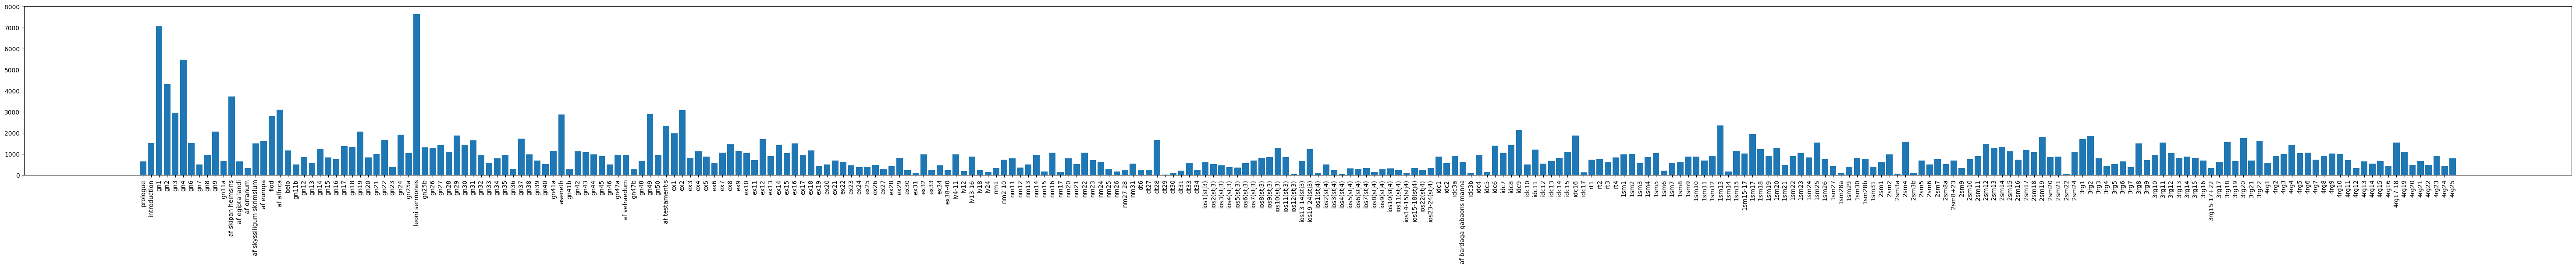

In [9]:
plt.rcParams['figure.figsize'] = [75, 5]
lengths = count_unit_lengths(data)
x = np.array(list(lengths.keys()))
y = np.array(list(lengths.values()))
plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.show()

In [10]:
with open('token_indices.json', 'w', encoding='utf-8') as outfile:
    json.dump(data, outfile, ensure_ascii=False, indent=4)
